In [5]:
# Отключаем предупреждения
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly
import plotly.graph_objs as go

from pylab import rcParams
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

warnings.simplefilter('ignore')
rcParams['figure.figsize'] = (10, 8)
init_notebook_mode(connected=True)

In [6]:
df = pd.read_csv('D:/Python Git/My_Libs/Machine Learning/Features/data/Video_Games_Sales_as_at_22_Dec_2016.csv')
df = df.dropna()
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [7]:
df.shape

useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'Critic_Score',
               'Critic_Count', 'User_Score', 'User_Count', 'Rating']
df[useful_cols]

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,28.32,87.0,80,8.4,594,E
11,Mario Kart DS,DS,2005,Racing,23.21,91.0,64,8.6,464,E
13,Wii Fit,Wii,2007,Sports,22.70,80.0,63,7.7,146,E
14,Kinect Adventures!,X360,2010,Misc,21.81,61.0,45,6.3,106,E
15,Wii Fit Plus,Wii,2009,Sports,21.79,80.0,33,7.4,52,E


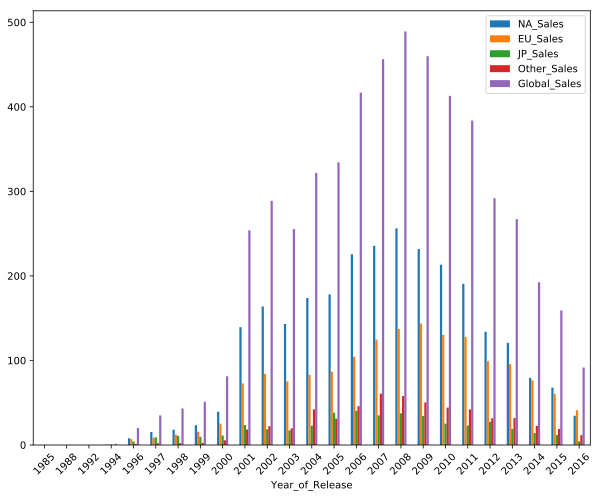

In [8]:
# Определенее колонок с продажами и суммирование продаж по годам, создавая группы по годам
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

In [9]:
# Построим табличную матрицу для определённых колонок
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

temp_df = df.drop([0])
temp_df[cols]

# sns.pairplot(temp_df[cols]).savefig('pairplot.png')

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
2,35.52,82.0,73,8.3,709
3,32.77,80.0,73,8.0,192
6,29.80,89.0,65,8.5,431
7,28.92,58.0,41,6.6,129
8,28.32,87.0,80,8.4,594
11,23.21,91.0,64,8.6,464
13,22.70,80.0,63,7.7,146
14,21.81,61.0,45,6.3,106
15,21.79,80.0,33,7.4,52
16,21.04,97.0,50,8.2,3994


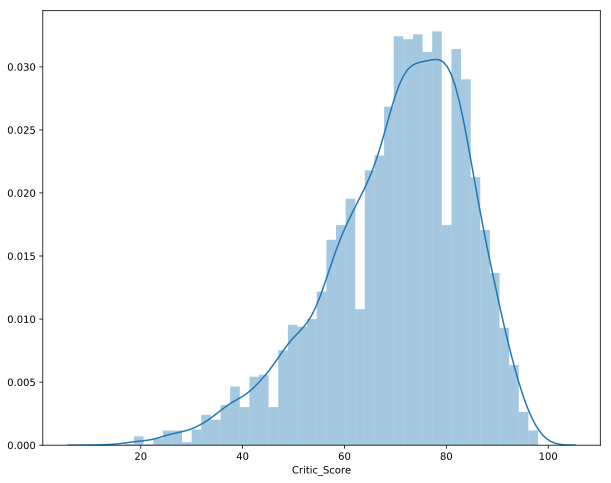

In [10]:
# Разбиваем на децили
sns.distplot(df.Critic_Score)

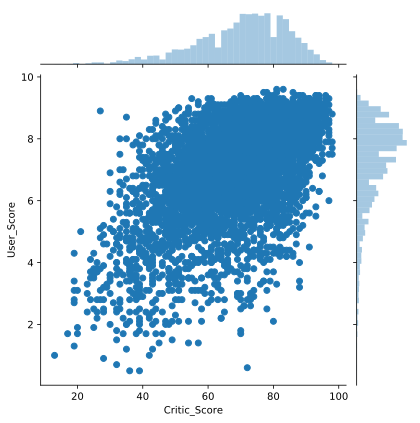

In [11]:
# Децили и взаимосвязь двух данных
sns.jointplot(df.Critic_Score, df.User_Score)

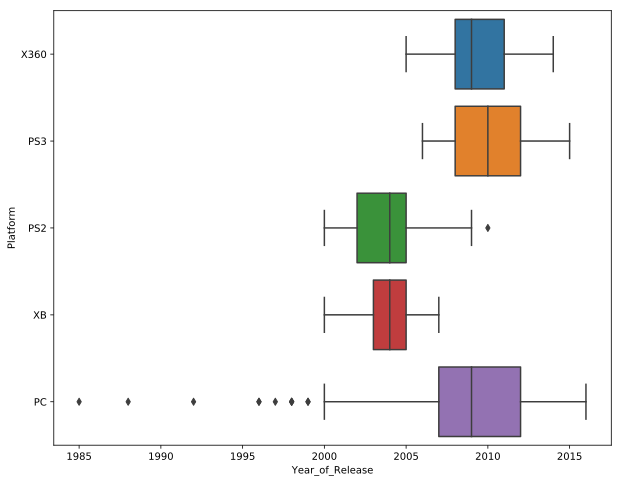

In [12]:
# Определяем топовые платформы и строим бокс-графики
top_platforms = df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y='Platform', x='Year_of_Release', data=df[df.Platform.isin(top_platforms)], orient='h')

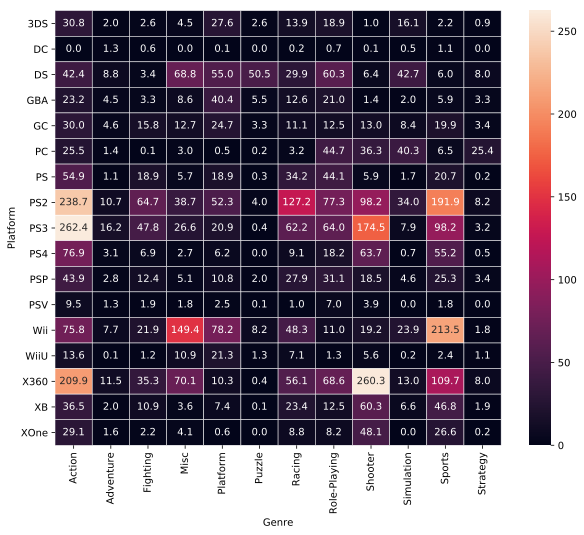

In [13]:
# Раскрашиваем сводную таблицу через горячую карту
platform_genre_sales = df.pivot_table(index='Platform',
                                     columns='Genre',
                                     values='Global_Sales',
                                     aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=0.5)

In [14]:
# Считаем количество продаж и количество вышедших игр в этот год
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# Линия числа продаж
trace0 = go.Scatter(x=years_df.index, y=years_df.Global_Sales, name='Global Sales')

# Линия числа игр
trace1 = go.Scatter(x=years_df.index, y=years_df.Number_of_Games, name='Number of games released')

# Массив данных и заголовок графика, и создаём фигуру
fig = go.Figure(data=[trace0, trace1], layout={'title': 'Statistics of video games'})
# iplot(fig, show_link=False)
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

'file://D:\\Python Git\\My_Libs\\Machine Learning\\Features\\pandas_graphs\\years_stats.html'

In [15]:
# Смотрим продажи и количество игр по платформам, и создаём график-бар
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

trace0 = go.Bar(x=platforms_df.index, y=platforms_df.Global_Sales, name='Global Sales')
trace1 = go.Bar(x=platforms_df.index, y=platforms_df.Number_of_Games, name='Number of game released')

data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [16]:
# Создаём дату с жанром игр и оценками критиков, выводим график с усами
data = []
for genre in df.Genre.unique():
    data.append(go.Box(name=genre, y=df[df.Genre == genre].Critic_Score))
iplot(data, show_link=False)

In [18]:
# Переходим к практике. Примеры визуального анализа данных
df = pd.read_csv('D:/Python Git/My_Libs/Machine Learning/Features/data/telecom_churn.csv')
df.head(5)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


Text(0.5, 1.0, 'Распределение оттока клиентов')

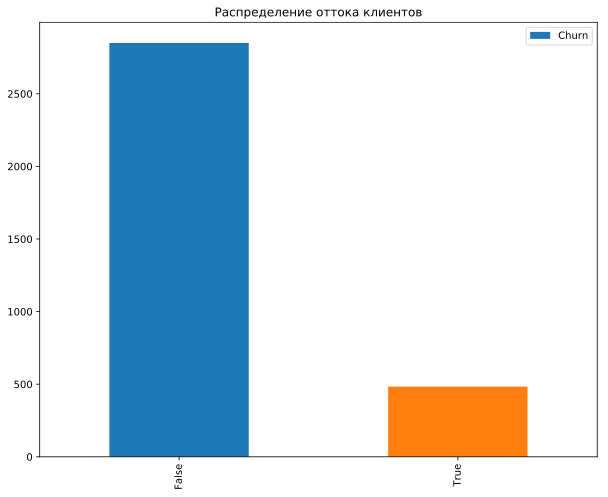

In [19]:
# График оттока клиентов
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов')

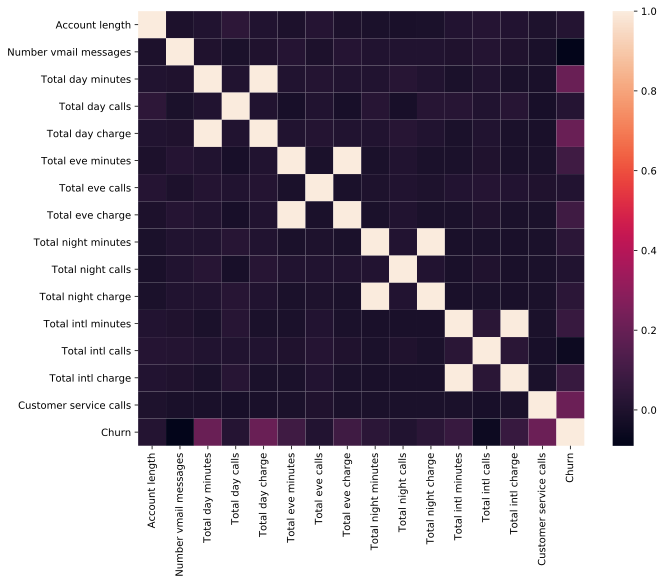

In [20]:
# Строим матрицу корреляций для колличественных признаков, чтобы отсеять то, что имеет высокую корреляцию
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan', 'Area code'], axis=1).corr()
sns.heatmap(corr_matrix)